# Machine Learning - Logistic Regression 
## (Matlab/Octave)

This exercise is taken from Machine Learning course on [coursera](https://www.coursera.org/learn/machine-learning/home/assignments) website. 

We will attempt to find the decision boundary for two cases. One where the decision boundary is linear and one where it's circular. However, they can be extended to various different cases using.
We have a training set and in multi-variable cases a test test to measure the accuracy of our models. 
The idea is the same, we are trying to find the best parameters $theta$ for the hypothesis function that can minimize the cost function. Except in this case, the hypothesis function is no longer a linear one but a logistic one meaning that it can have two possible outcomes 0, or 1, The outcome is either positive or negative. 
Sigmoid Function: $h(\theta) = {1 \over {1+e^{-\theta^T .X}}}$

Cost function: 
$J(\theta) = {1 \over m} \sum_{i=1}^{m} y^{(i)} \log(h_{\theta}x^{(i)}+ (1-y^{(i)}) \log(1-h_{\theta}(x^{(i)})) + \lambda \sum_{j=1}^{n} \theta_j^2$

Where $\theta_0$ must not be regularized.

The code will start from $\theta =[0,0]$ and update in every iteration such that :

$\theta_j := \theta_j - \alpha {\partial J(\theta) \over \partial \theta_j} $ 


where $\alpha$ is the learning rate and $\lambda$ is the regularization parameter taking care of over and under fitting. 

It's worhtwhile to mention that in multi-clustered cases we determine the decision boundary using the one-vs-all approach where we run the code for every cluster versus all the others grouped in one. 



##### This is the main body of the program:

In [ ]:
%% Initialization
clear ; close all; clc

%% Load Data
%  The first two columns contains the exam scores and the third column
%  contains the label.

data = load('ex2data1.txt');
X = data(:, [1, 2]); y = data(:, 3);

%% ==================== Part 1: Plotting ====================
%  We start the exercise by first plotting the data to understand the 
%  the problem we are working with.

fprintf(['Plotting data with + indicating (y = 1) examples and o ' ...
         'indicating (y = 0) examples.\n']);

plotData(X, y);

% Put some labels 
hold on;
% Labels and Legend
xlabel('Exam 1 score')
ylabel('Exam 2 score')

% Specified in plot order
legend('Admitted', 'Not admitted')
hold off;

fprintf('\nProgram paused. Press enter to continue.\n');
pause;


%% ============ Part 2: Compute Cost and Gradient ============
%  In this part of the exercise, you will implement the cost and gradient
%  for logistic regression. You neeed to complete the code in 
%  costFunction.m

%  Setup the data matrix appropriately, and add ones for the intercept term
[m, n] = size(X);

% Add intercept term to x and X_test
X = [ones(m, 1) X];

% Initialize fitting parameters
initial_theta = zeros(n + 1, 1);

% Compute and display initial cost and gradient
[cost, grad] = costFunction(initial_theta, X, y);

fprintf('Cost at initial theta (zeros): %f\n', cost);
fprintf('Gradient at initial theta (zeros): \n');
fprintf(' %f \n', grad);

fprintf('\nProgram paused. Press enter to continue.\n');
pause;


%% ============= Part 3: Optimizing using fminunc  =============
%  In this exercise, you will use a built-in function (fminunc) to find the
%  optimal parameters theta.

%  Set options for fminunc
options = optimset('GradObj', 'on', 'MaxIter', 400);

%  Run fminunc to obtain the optimal theta
%  This function will return theta and the cost 

[theta, cost] = ...
fminunc(@(t)(costFunction(t, X, y)), initial_theta, options);

% Print theta to screen
fprintf('Cost at theta found by fminunc: %f\n', cost);
fprintf('theta: \n');
fprintf(' %f \n', theta);

% Plot Boundary
plotDecisionBoundary(theta, X, y);

% Put some labels 
hold on;
% Labels and Legend
xlabel('Exam 1 score')
ylabel('Exam 2 score')

% Specified in plot order
legend('Admitted', 'Not admitted')
hold off;

fprintf('\nProgram paused. Press enter to continue.\n');
pause;

%% ============== Part 4: Predict and Accuracies ==============
%  After learning the parameters, you will like to use it to predict the outcomes
%  on unseen data. In this part, you will use the logistic regression model
%  to predict the probability that a student with score 45 on exam 1 and 
%  score 85 on exam 2 will be admitted.
%
%  Furthermore, you will compute the training and test set accuracies of 
%  our model.
%
%  Your task is to complete the code in predict.m

%  Predict probability for a student with score 45 on exam 1 
%  and score 85 on exam 2 

prob = sigmoid([1 45 85] * theta);
fprintf(['For a student with scores 45 and 85, we predict an admission ' ...
         'probability of %f\n\n'], prob);

% Compute accuracy on our training set
p = predict(theta, X);

fprintf('Train Accuracy: %f\n', mean(double(p == y)) * 100);

fprintf('\nProgram paused. Press enter to continue.\n');
pause;



#### this part will plot the data 

In [ ]:
function plotData(X, y)
figure; hold on;
pos = find(y==1);
neg = find(y==0);
plot(X(pos,1), X(pos,2),'r*', 'Markersize' , 7) 
hold on;
plot(X(neg,1), X(neg,2), 'g+', 'MarkerFaceColor','y', 'MarkerSize', 7)
hold off;
end

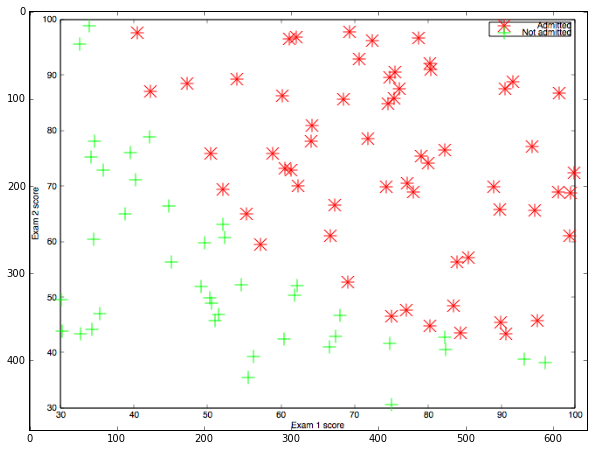

##### This part will calculate the cost function and gradient decent

In [ ]:
function [J, grad] = costFunction(theta, X, y)
%COSTFUNCTION Compute cost and gradient for logistic regression
%   J = COSTFUNCTION(theta, X, y) computes the cost of using theta as the
%   parameter for logistic regression and the gradient of the cost
%   w.r.t. to the parameters.

% Initialize some useful values
m = length(y); % number of training examples

% You need to return the following variables correctly 
J = 0;
grad = zeros(size(theta));

matrix = X*theta ; 
htheta = sigmoid(matrix);
first = -y .* log(htheta) ;
second = (1-y) .* log(1-htheta) ;
J = (1/m)*(sum(first-second));

grad  = (1/m)*sum((htheta-y) .* X);

end

#### This will calculate the sigmoid function for whatever input :

In [ ]:
function g = sigmoid(z)
%SIGMOID Compute sigmoid functoon
% Calling sequence:   J = SIGMOID(z)

% You need to return the following variables correctly 
g = zeros(size(z));

% ====================== YOUR CODE HERE ======================
% Instructions: Compute the sigmoid of each value of z (z can be a matrix,
%               vector or scalar).

zneg = -z ;
eterm = e.^zneg;
g = 1./(eterm+1d0);
end


In Logistic Regression Case we can use a built in function called *fminunc* 
which basically takes initial cost function and X and Y of the training set as well as a few 
specification on how many iterations should there be and so on and it evenetually returns the 
best theta values. 

In [ ]:
[theta, cost] = ...
fminunc(@(t)(costFunction(t, X, y)), initial_theta, options);

##### Then we can plot the decision boundary,

In [ ]:
function plotDecisionBoundary(theta, X, y)
%PLOTDECISIONBOUNDARY Plots the data points X and y into a new figure with
%the decision boundary defined by theta
%   PLOTDECISIONBOUNDARY(theta, X,y) plots the data points with + for the 
%   positive examples and o for the negative examples. X is assumed to be 
%   a either 
%   1) Mx3 matrix, where the first column is an all-ones column for the 
%      intercept.
%   2) MxN, N>3 matrix, where the first column is all-ones

% Plot Data
plotData(X(:,2:3), y);
hold on

if size(X, 2) <= 3
    % Only need 2 points to define a line, so choose two endpoints
    plot_x = [min(X(:,2))-2,  max(X(:,2))+2];

    % Calculate the decision boundary line
    plot_y = (-1./theta(3)).*(theta(2).*plot_x + theta(1));

    % Plot, and adjust axes for better viewing
    plot(plot_x, plot_y)
    
    % Legend, specific for the exercise
    legend('Admitted', 'Not admitted', 'Decision Boundary')
    axis([30, 100, 30, 100])
else
    % Here is the grid range
    u = linspace(-1, 1.5, 50);
    v = linspace(-1, 1.5, 50);

    z = zeros(length(u), length(v));
    % Evaluate z = theta*x over the grid
    for i = 1:length(u)
        for j = 1:length(v)
            z(i,j) = mapFeature(u(i), v(j))*theta;
        end
    end
    z = z'; % important to transpose z before calling contour

    % Plot z = 0
    % Notice you need to specify the range [0, 0]
    contour(u, v, z, [0, 0], 'LineWidth', 2)
end
hold off

end


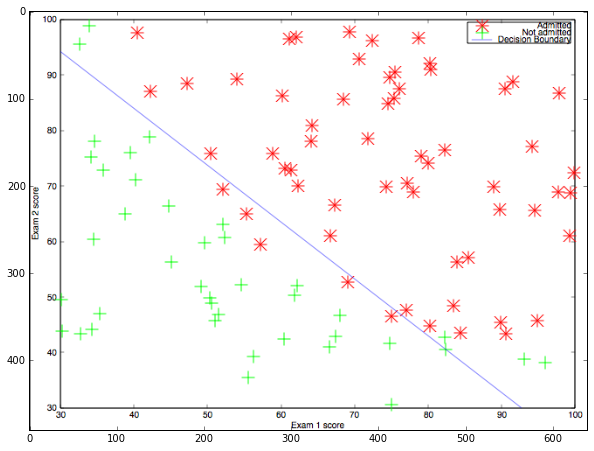

##### Then the can use a test subject to find the accuracy of our code:
what is the outcome if a student has the mark of 45 on the first exam and 85 o n the second exam, will they be admitted to the university? prob = sigmoid([1 45 85] * theta);
The following piece of code will determine that based on the best-fit decision boundary theta that we found in the previoud code, and then it compares it to a treshold of 0.5. if 
$h(\theta)$ is lower than the decision boundary we predict a positive outcome (p=1) 
and if not negative (p=0).


In [ ]:
function p = predict(theta, X)
%PREDICT Predict whether the label is 0 or 1 using learned logistic 
%regression parameters theta
%   p = PREDICT(theta, X) computes the predictions for X using a 
%   threshold at 0.5 (i.e., if sigmoid(theta'*x) >= 0.5, predict 1)

m = size(X, 1); % Number of training examples

% You need to return the following variables correctly
p = zeros(m, 1);

% ====================== YOUR CODE HERE ======================
% Instructions: Complete the following code to make predictions using
%               your learned logistic regression parameters. 
%               You should set p to a vector of 0s and 1's
threshold = 0.5 ;
matrix = X*theta;
htheta = sigmoid(matrix) ;

zero = find(htheta < threshold);
p(zero) =  0; 

one = find(htheta >= threshold );
p(one) = 1 ;
end

The program will give the following output:
    >> For a student with scores 45 and 85, we predict an admission probability of 0.776289
    >> Training Accuracy 89.0

In the second case, the decision boundary is no longer linear, it is polynomial or circular. 
In this case we have to use a more complicated hypothesis function. It is no longer a simple
$\theta^T. X$ with $X = [1,x_1, x_2, ...,x_n]$ but this time it take a form that is more like this:

$h_\theta(x) = \theta^T . (1,x_1, x_2,x_1x_2, x_1^2,x_2^2, x_1x_2^2, x_1^3,...,x_2^6)$

##### The main body of the code this time is very much the same as before except that we have to map our X features to get this matrix. 

In [ ]:
function out = mapFeature(X1, X2)
% MAPFEATURE Feature mapping function to polynomial features
%
%   MAPFEATURE(X1, X2) maps the two input features
%   to quadratic features used in the regularization exercise.
%
%   Returns a new feature array with more features, comprising of 
%   X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2, etc..
%
%   Inputs X1, X2 must be the same size
%

degree = 6;
out = ones(size(X1(:,1)));
for i = 1:degree
    for j = 0:i
        out(:, end+1) = (X1.^(i-j)).*(X2.^j);
    end
end

end

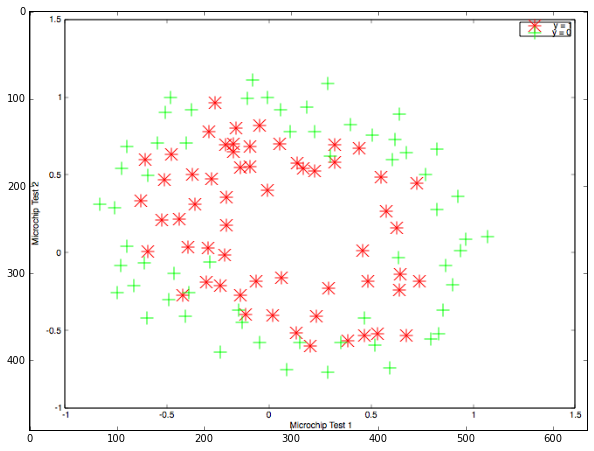

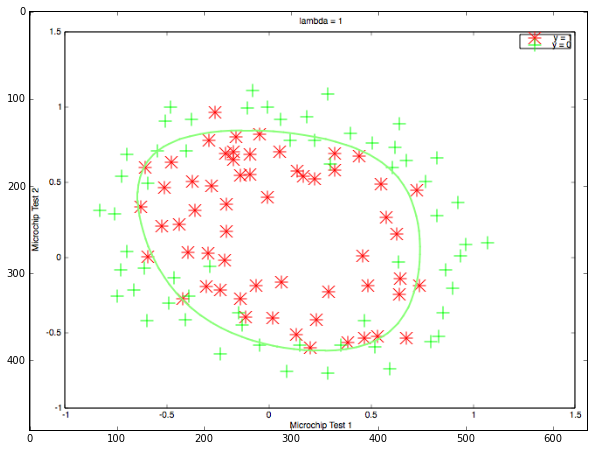

>> Train Accuracy: 83.898305
